# The environmental impact of food quality. Part 2: statistical analysis#

This notebook illustrates the first part of the project. Univariate and multivariate correlations are calculated to assess relationship between food quality and its environmental impact.

In [1]:
import pandas as pd 
# DATA file download link:
# https://drive.google.com/open?id=1HEoGaFnCwNHOs7mSSU113RkwsFaPLVvC
df_eco_all = pd.read_csv( "openfoodfacts_Eco.csv") # raw dataframe

df_eco_all.head()


,Unnamed: 0,product_name,nutrition_grade_fr,nutrition_grade_fr_n,pnns_groups_2,carbon-footprint_100g,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n
0,0,Suprême Noir Authentique,d,8.0,chocolate products,2842.0,0.0,0.0
1,1,Viande des grisons,d,8.0,meat,2520.0,0.0,0.0
2,2,Saucisson sec,e,1.0,processed meat,2380.0,0.0,0.0
3,3,Chocolat blanc,e,1.0,chocolate products,1440.0,0.0,0.0
4,4,Chocolat au lait,e,1.0,chocolate products,1321.0,0.0,0.0


In [2]:
df_eco_all =df_eco_all.drop(['Unnamed: 0'], axis=1)
df_eco_all = df_eco_all.rename({'pnns_groups_2': 'catPNNS'}, axis=1) #easier name
df_eco_all.head()

,product_name,nutrition_grade_fr,nutrition_grade_fr_n,catPNNS,carbon-footprint_100g,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n
0,Suprême Noir Authentique,d,8.0,chocolate products,2842.0,0.0,0.0
1,Viande des grisons,d,8.0,meat,2520.0,0.0,0.0
2,Saucisson sec,e,1.0,processed meat,2380.0,0.0,0.0
3,Chocolat blanc,e,1.0,chocolate products,1440.0,0.0,0.0
4,Chocolat au lait,e,1.0,chocolate products,1321.0,0.0,0.0


Visualize collerations among variables and outliers: scatterplots

/home/marco/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/marco/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


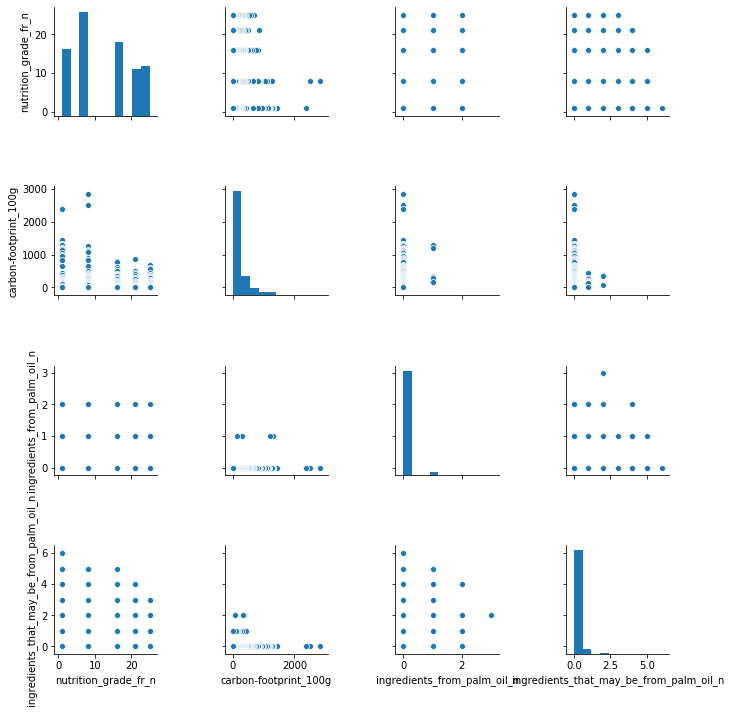

In [11]:
# plot eventual correlations for the main dataframe containing data relative to quality and environmental impact

import seaborn as sns
sns.pairplot(df_eco_all)

In [3]:
# some correlation can be observed between nutrition score and carbon foodprint
# no obvious correlations can be observed between the two main ecological parameters: carbon footprint and number of palm oil ingredients
# moreover, the columns still contain zero and Nan values
# based on this we split the database and analize the subset after a further cleaning
carbon_categories = ['product_name','nutrition_grade_fr_n','nutrition_grade_fr','catPNNS', 'carbon-footprint_100g']
df_carbon = df_eco_all[carbon_categories]
df_carbon = df_carbon.dropna(subset=['carbon-footprint_100g', 'nutrition_grade_fr_n']) 
df_carbon = df_carbon.sort_values(by=['carbon-footprint_100g'], ascending=False)
df_carbon = df_carbon[df_carbon['carbon-footprint_100g'] > 1]  # eliminate unrealistic values
print(df_carbon.shape) # overview
df_carbon[:5]

(230, 5)


,product_name,nutrition_grade_fr_n,nutrition_grade_fr,catPNNS,carbon-footprint_100g
0,Suprême Noir Authentique,8.0,d,chocolate products,2842.0
1,Viande des grisons,8.0,d,meat,2520.0
2,Saucisson sec,1.0,e,processed meat,2380.0
3,Chocolat blanc,1.0,e,chocolate products,1440.0
4,Chocolat au lait,1.0,e,chocolate products,1321.0


0.10907617786771782


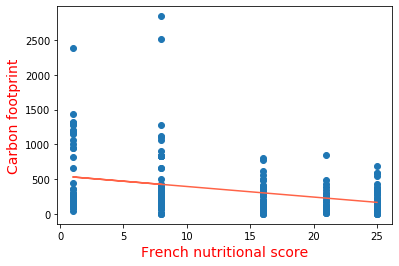

In [7]:
# as it could also be observed in the matrix above, higher nutrition score have an as an average a higher carbon footprint. We plot again the graph below.
# and we estimate the visual observation with a simple univariate linear regression
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from sklearn import linear_model
X0 = np.matrix([np.ones(df_carbon.shape[0]), df_carbon['nutrition_grade_fr_n'] ]).T
y0 = np.matrix([df_carbon['carbon-footprint_100g']]).T

regr = linear_model.LinearRegression() 
regr.fit(X0, y0)
estimated_carbon_foodprint = regr.predict(X0)
accuracy0 = regr.score(X0, y0)
print(accuracy0)


plt.scatter(df_carbon['nutrition_grade_fr_n'],df_carbon['carbon-footprint_100g'] )
plt.plot(df_carbon['nutrition_grade_fr_n'],estimated_carbon_foodprint, color = 'tomato' )
plt.xlabel('French nutritional score', color="red", fontsize = 14)
plt.ylabel('Carbon footprint', color="red", fontsize = 14)
plt.savefig("Quality carbon0.png", format="PNG")

0.5264569440177671


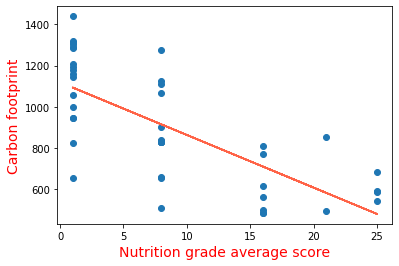

In [14]:
# the above score is low. The accuracy may be improved by filtering out data
df_carbon_masked = df_carbon[df_carbon['carbon-footprint_100g'] > 450] 
df_carbon_masked = df_carbon_masked[df_carbon_masked['carbon-footprint_100g'] < 1500] 

X0 = np.matrix([np.ones(df_carbon_masked.shape[0]), df_carbon_masked['nutrition_grade_fr_n'] ]).T
y0 = np.matrix([df_carbon_masked['carbon-footprint_100g']]).T

regr = linear_model.LinearRegression() 
regr.fit(X0, y0)
estimated_carbon_foodprint = regr.predict(X0)
accuracy0 = regr.score(X0, y0)
print(accuracy0)

plt.scatter(df_carbon_masked['nutrition_grade_fr_n'],df_carbon_masked['carbon-footprint_100g'] )
plt.plot(df_carbon_masked['nutrition_grade_fr_n'],estimated_carbon_foodprint, color = 'tomato' )
plt.xlabel('Nutrition grade average score', color="red", fontsize = 14)
plt.ylabel('Carbon footprint', color="red", fontsize = 14)
plt.savefig("Quality carbon1.png", format="PNG")

# but this way lots of datapoints are removed for low carbon footprints and results are less significant

Scattering within food nutritional categories is better shown by a boxplot

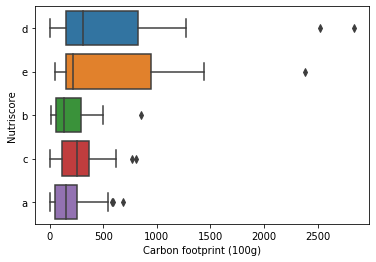

In [29]:
import seaborn as sns
boxcarbon = sns.boxplot( y=df_carbon["nutrition_grade_fr"], x=df_carbon["carbon-footprint_100g"] );
plt.xlabel('Carbon footprint (100g)')
plt.ylabel('Nutriscore')
plt.savefig("Quality carbon box.png", format="PNG", dpi=120)
plt.show()

let's check what the three main outliers are by inspecting categoories D and E

In [17]:
df_carbon_d = df_carbon[df_carbon['nutrition_grade_fr'] == 'd']
df_carbon_d = df_carbon_d.sort_values(by=['carbon-footprint_100g'], ascending=False)
df_carbon_d[:5]

,product_name,nutrition_grade_fr_n,nutrition_grade_fr,catPNNS,carbon-footprint_100g
0,Suprême Noir Authentique,8.0,d,chocolate products,2842.0000
1,Viande des grisons,8.0,d,meat,2520.0000
9,Emmental Français Est-Central IGP au lait cru ...,8.0,d,cheese,1275.0000
16,Emmental Français Râpé (29 % MG),8.0,d,cheese,1127.0000
17,Emmental Français Râpé (29 % MG),8.0,d,cheese,1113.0547


In [18]:
df_carbon_e = df_carbon[df_carbon['nutrition_grade_fr'] == 'e']
df_carbon_e = df_carbon_e.sort_values(by=['carbon-footprint_100g'], ascending=False)
df_carbon_e[:5]

,product_name,nutrition_grade_fr_n,nutrition_grade_fr,catPNNS,carbon-footprint_100g
2,Saucisson sec,1.0,e,processed meat,2380.0
3,Chocolat blanc,1.0,e,chocolate products,1440.0
4,Chocolat au lait,1.0,e,chocolate products,1321.0
5,Chocolat Tourist Crémant,1.0,e,chocolate products,1311.0
6,Chocolat au lait,1.0,e,chocolate products,1305.0


The above graphs indicates that the carbon foodprint is better related to an average value for each food nutritional grade (score)

In [13]:

df_carbon_impact = df_carbon.drop(columns=['catPNNS','product_name','nutrition_grade_fr']) # only numerical values for correlation
df_carbon_impact = df_carbon_impact[df_carbon_impact['carbon-footprint_100g'] < 1500] # remove the three outliers 
df_carbon_impact = df_carbon_impact.groupby(['nutrition_grade_fr_n']).mean()
df_carbon_impact = df_carbon_impact.sort_values(by=['nutrition_grade_fr_n'], ascending=False)
df_carbon_impact.reset_index(inplace=True)
grades =['A','B','C','D','E']
df_carbon_impact['french food grade'] =grades

df_carbon_impact

,nutrition_grade_fr_n,carbon-footprint_100g,french food grade
0,25.0,180.508039,A
1,21.0,202.532000,B
2,16.0,265.320889,C
3,8.0,405.965094,D
4,1.0,469.232143,E


In [14]:
# this grouping indicates that food quality and carbon footprint are well correlated
X1 = np.matrix([np.ones(df_carbon_impact.shape[0]), df_carbon_impact['nutrition_grade_fr_n'] ]).T
y1 = np.matrix([df_carbon_impact['carbon-footprint_100g']]).T

regr = linear_model.LinearRegression() 
regr.fit(X1, y1)
estimated_carbon_foodprint_byGrade = regr.predict(X1)
accuracy12 = regr.score(X1, y1)
print(accuracy12) # 0.98 is high!!!

0.9817147753464976


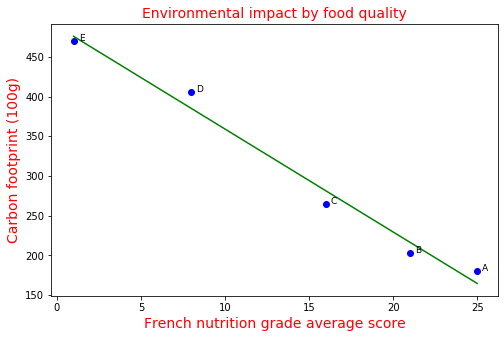

In [32]:
# the evident correlation is shown by the graph below
plt.figure(figsize=(8,5))

x_coords = df_carbon_impact['nutrition_grade_fr_n']
y_coords = df_carbon_impact['carbon-footprint_100g']
for i,type in enumerate(grades):
    x = x_coords[i]
    y = y_coords[i]
    plt.scatter(x, y, marker='o', color='blue')
    plt.text(x+0.3, y+0.3, type, fontsize=9)

plt.plot(df_carbon_impact['nutrition_grade_fr_n'],estimated_carbon_foodprint_byGrade, color = 'g' )
plt.title('Environmental impact by food quality', color="red", fontsize = 14)
plt.xlabel('French nutrition grade average score', color="red", fontsize = 14)
plt.ylabel('Carbon footprint (100g)', color="red", fontsize = 14)

plt.savefig("Quality carbon footprint.png", format="PNG", dpi= 150)



Since also palm oil is related to the environmental impact, we can include this parameters to the correlation to food quality

In [18]:
palm_categories = ['nutrition_grade_fr_n', 'ingredients_from_palm_oil_n', 'ingredients_that_may_be_from_palm_oil_n']
df_palm = df_eco_all[palm_categories]

#df_palm = df_palm[df_palm['ingredients_from_palm_oil_n'] > 0] 
#df_palm = df_palm[df_palm['ingredients_that_may_be_from_palm_oil_n'] > 0] 
df_palm = df_palm.sort_values(by=['ingredients_from_palm_oil_n'], ascending=False)

df_palm = df_palm.dropna() 
df_palm = df_palm.groupby(['nutrition_grade_fr_n']).mean() 

df_palm = df_palm.reset_index(drop=False)

print(df_palm.shape)
df_palm

(5, 3)


,nutrition_grade_fr_n,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n
0,1.0,0.090503,0.136313
1,8.0,0.047254,0.140246
2,16.0,0.024064,0.082146
3,21.0,0.008934,0.063877
4,25.0,0.003852,0.027616


A multivariate regression with test - train set is not helpful in this case, since we grouped data into 5 rows only

In [19]:
# prepare data
X2 = df_palm.iloc[:, 1:3].values
y2 = df_palm.iloc[:, 0].values


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size = 0.5, random_state = 42)

regr.fit(X_train, y_train)
y_pred = regr.predict(X_test) # estimation of nutrition score based on fit

accuracy2 = regr.score(X_test, y_test)
print('score = ',accuracy2)
print('')
print(X2)

score =  0.9714538705920392

[[0.09050279 0.13631285]
 [0.04725438 0.14024562]
 [0.02406386 0.08214579]
 [0.00893406 0.06387673]
 [0.00385189 0.02761556]]


Much better a simple multivariate linear regression

In [20]:
regr = linear_model.LinearRegression() 
regr.fit(X2, y2)
y_pred = regr.predict(X2)
accuracy21 = regr.score(X2, y2)
print(accuracy21)

0.9983846229767137


#PCA and Multivariate analysis with all parameters 
average for each French food grade (instead of letters we use the average grade score)

In [21]:
numerical_categories = ['nutrition_grade_fr_n','carbon-footprint_100g','ingredients_from_palm_oil_n','ingredients_that_may_be_from_palm_oil_n']
df_eco = df_eco_all[numerical_categories]
df_eco = df_eco_all.dropna(subset=['carbon-footprint_100g', 'nutrition_grade_fr_n'])

df_eco = df_eco.fillna(value = 0)
df_eco = df_eco.groupby(['nutrition_grade_fr_n']).mean() 
df_eco = df_eco.sort_values(by=['nutrition_grade_fr_n'], ascending=True)
print(df_eco.shape)
df_eco = df_eco.reset_index(level=0, inplace=False) # gets grades to the first column
df_eco

(5, 3)


,nutrition_grade_fr_n,carbon-footprint_100g,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n
0,1.0,304.862766,0.031915,0.031915
1,8.0,442.435426,0.017241,0.034483
2,16.0,213.204286,0.000000,0.053571
3,21.0,168.776667,0.000000,0.066667
4,25.0,153.431833,0.033333,0.050000


A multivariate linear regression that correlates all ecology variables to food quality produces still a good score

In [22]:
#linear fit
X3 = df_eco.iloc[:, 1:4].values
y3 = df_eco.iloc[:, 0].values


regr.fit(X3, y3)
y_pred = regr.predict(X3) # estimation of nutrition score based on fit

accuracy3 = regr.score(X3, y3)
print(accuracy3)

0.8168762585544673


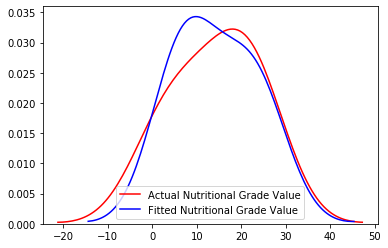

In [23]:
ax1 = sns.distplot(y3, hist=False, color="r", label="Actual Nutritional Grade Value")
sns.distplot(y_pred, hist=False, color="b", label="Fitted Nutritional Grade Value" , ax=ax1)

Principal components analysis

In [24]:
features = ['ingredients_from_palm_oil_n', 'ingredients_that_may_be_from_palm_oil_n', 'carbon-footprint_100g',] # select the features to transform

# Separating out the features
x = df_eco.loc[:, features].values
from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(x) # scale those features
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
principalComponents = pca.fit_transform(x)

principal_eco_Df = pd.DataFrame(data = principalComponents , columns = ['environmental impact'])


print('the new component contains',pca.explained_variance_ratio_ * 100, '% of the information from the two variables')
# 

the new component contains [70.52814958] % of the information from the two variables


In [25]:
df_eco['environmental impact'] = principal_eco_Df['environmental impact']
df_eco.head()

,nutrition_grade_fr_n,carbon-footprint_100g,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,environmental impact
0,1.0,304.862766,0.031915,0.031915,-1.578266
1,8.0,442.435426,0.017241,0.034483,-1.660346
2,16.0,213.204286,0.000000,0.053571,1.104170
3,21.0,168.776667,0.000000,0.066667,2.024936
4,25.0,153.431833,0.033333,0.050000,0.109506


In [26]:
X4 = np.matrix([np.ones(df_eco.shape[0]), df_eco['environmental impact'] ]).T
y4 = np.matrix([df_eco['nutrition_grade_fr_n']]).T

regr = linear_model.LinearRegression() 
regr.fit(X4, y4)
predicted_quality = regr.predict(X4)
accuracy4 = regr.score(X4, y4)
print(accuracy4)

0.5765409750987477


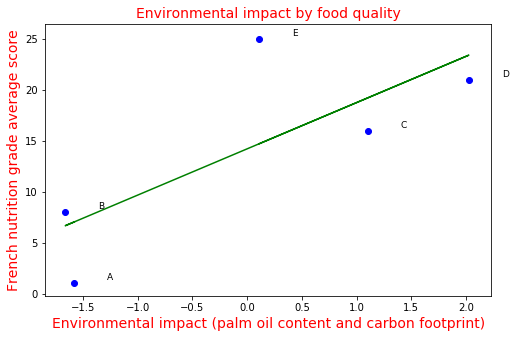

<Figure size 432x288 with 0 Axes>

In [27]:
plt.figure(figsize=(8,5))

x_coords = df_eco['environmental impact']
y_coords = df_eco['nutrition_grade_fr_n']
for i,type in enumerate(grades):
    x = x_coords[i]
    y = y_coords[i]
    plt.scatter(x, y, marker='o', color='blue')
    plt.text(x+0.3, y+0.3, type, fontsize=9)

plt.plot(df_eco['environmental impact'],predicted_quality, color = 'g' )
plt.title('Environmental impact by food quality', color="red", fontsize = 14)
plt.xlabel('Environmental impact (palm oil content and carbon footprint)', color="red", fontsize = 14)
plt.ylabel('French nutrition grade average score', color="red", fontsize = 14)


plt.show()

plt.savefig("Quality all.png", format="PNG")

Change of model for random forest regressor, that takes into account categorical data 

In [28]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with few decision trees: too low, underfitting, too high overfiting and heavy processing. Since data are so scarce we keep it low

rf = RandomForestRegressor(n_estimators = 10, random_state = 42) 
rf.fit(X3, y3)
predicted_quality = rf.predict(X3)
accuracy5 = rf.score(X3, y3)
print(accuracy5)

0.8821805702217529


Text(0, 0.5, 'French nutrition grade average score')

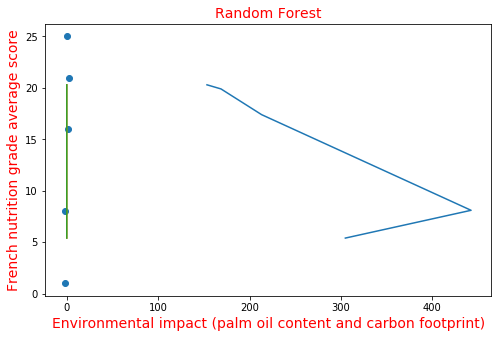

In [29]:
plt.figure(figsize=(8,5))

plt.scatter(x_coords, y_coords)
plt.plot(X3, predicted_quality)
plt.title('Random Forest', color="red", fontsize = 14)
plt.xlabel('Environmental impact (palm oil content and carbon footprint)', color="red", fontsize = 14)
plt.ylabel('French nutrition grade average score', color="red", fontsize = 14)

better prediction by random forest algorithm than multivariate linear regression

# Which categories of food are best for nutrition and the environment?

In [30]:
df_carbon.head()

,product_name,nutrition_grade_fr_n,nutrition_grade_fr,catPNNS,carbon-footprint_100g
0,Suprême Noir Authentique,8.0,d,chocolate products,2842.0
1,Viande des grisons,8.0,d,meat,2520.0
2,Saucisson sec,1.0,e,processed meat,2380.0
3,Chocolat blanc,1.0,e,chocolate products,1440.0
4,Chocolat au lait,1.0,e,chocolate products,1321.0


In [31]:
palm_categories = ['product_name','catPNNS','nutrition_grade_fr_n', 'ingredients_from_palm_oil_n', 'ingredients_that_may_be_from_palm_oil_n']
df_palm = df_eco_all[palm_categories]
df_palm = df_palm[df_palm['ingredients_from_palm_oil_n'] > 0] 
df_palm = df_palm[df_palm['ingredients_that_may_be_from_palm_oil_n'] > 0]

df_palm['palm_oil_tot'] = df_palm['ingredients_from_palm_oil_n'] + df_palm['ingredients_that_may_be_from_palm_oil_n']
df_palm = df_palm.dropna() 
df_palm = df_palm.sort_values(by=['palm_oil_tot'], ascending=False)
df_palm[:15]

,product_name,catPNNS,nutrition_grade_fr_n,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,palm_oil_tot
304421,Berlinas cacao,sweets,1.0,2.0,4.0,6.0
584645,Donuts fourrés caramel avec glacage blanc,biscuits and cakes,1.0,1.0,4.0,5.0
1002625,Croissant Tiernos y Deliciosos,pastries,1.0,1.0,4.0,5.0
562973,Tropéziennes,biscuits and cakes,8.0,1.0,4.0,5.0
562955,Fraisier 8 parts,biscuits and cakes,8.0,1.0,4.0,5.0
637593,Chinois Nature,pastries,8.0,1.0,4.0,5.0
562901,2 religieuses chocolat,biscuits and cakes,8.0,1.0,4.0,5.0
562900,2 Religieuses au Café,biscuits and cakes,8.0,1.0,4.0,5.0
868595,Napolitain L'Original,biscuits and cakes,1.0,1.0,4.0,5.0
289595,"Napolitain, l'Original",biscuits and cakes,8.0,1.0,4.0,5.0


In [32]:
df_palm = df_palm.groupby(['catPNNS']).mean()
df_palm = df_palm.sort_values(by=['palm_oil_tot'], ascending=False)
df_palm[:-10]

,nutrition_grade_fr_n,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,palm_oil_tot
catPNNS,,,,
pastries,7.117117,1.000000,1.936937,2.936937
dairy desserts,4.714286,1.000000,1.571429,2.571429
bread,14.870588,1.000000,1.541176,2.541176
milk and yogurt,16.333333,1.000000,1.500000,2.500000
biscuits and cakes,4.684982,1.019536,1.416361,2.435897
fats,12.328947,1.000000,1.401316,2.401316
sandwiches,11.842857,1.000000,1.357143,2.357143
unknown,7.788945,1.015075,1.266332,2.281407
appetizers,4.714286,1.031746,1.222222,2.253968


In [33]:
# here a visualization of average environmental impact (carbon footprint)
# and quality for each category according to the french national health programme
df_carbon_cat = df_carbon[['nutrition_grade_fr_n','catPNNS', 'carbon-footprint_100g']]
df_carbon_cat = df_carbon_cat[df_carbon_cat.catPNNS != 'unknown']

df_carbon_cat = df_carbon_cat.groupby(['catPNNS']).mean()
df_carbon_cat = df_carbon_cat.sort_values(by=['carbon-footprint_100g'], ascending=False)
df_carbon_cat = df_carbon_cat.reset_index(drop=False)
df_carbon_cat[:-10]
print(df_carbon_cat.shape)

(28, 3)


In [34]:
df_carbon_cat.describe()

,nutrition_grade_fr_n,carbon-footprint_100g
count,28.000000,28.000000
mean,13.182704,340.513608
std,7.698734,313.463702
min,1.000000,61.633333
25%,7.500000,174.595833
50%,13.583333,268.685714
75%,19.418831,419.279548
max,25.000000,1687.500000


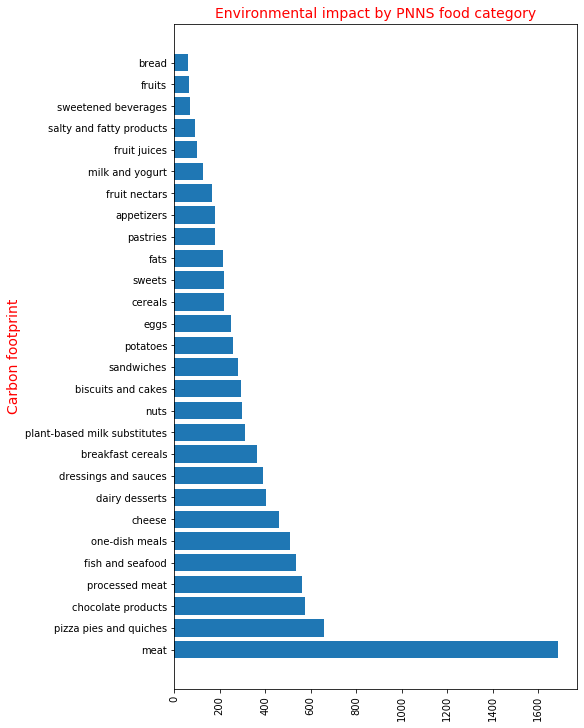

In [49]:
plt.figure(figsize=(8,10))

plt.barh(df_carbon_cat['catPNNS'], df_carbon_cat['carbon-footprint_100g'])
plt.title('Environmental impact by PNNS food category', color="red", fontsize = 14)
plt.ylabel('Carbon footprint', color="red", fontsize = 14)
plt.xticks(rotation='vertical')
plt.rcParams['figure.constrained_layout.use'] = True
plt.savefig("PNNS Category based carbon footprint.png", format="PNG", dpi = 100)

In [16]:
df_meat = df_carbon[df_carbon['catPNNS'] == 'meat']
df_meat = df_meat.sort_values(by=['carbon-footprint_100g'], ascending=False)
df_meat = df_meat[['product_name', 'carbon-footprint_100g','nutrition_grade_fr']]
df_meat

,product_name,carbon-footprint_100g,nutrition_grade_fr
1,Viande des grisons,2520.0,d
25,"Filet de Poulet tranché, cuit au four, nature",855.0,b


In [20]:
df_prmeat = df_carbon[df_carbon['catPNNS'] == 'processed meat']
df_prmeat = df_prmeat.sort_values(by=['carbon-footprint_100g'], ascending=False)
df_prmeat = df_prmeat[['product_name', 'carbon-footprint_100g','nutrition_grade_fr']]
df_prmeat

,product_name,carbon-footprint_100g,nutrition_grade_fr
2,Saucisson sec,2380.0,e
8,Jambon de Bayonne,1285.0,e
22,Lardons fumés,945.0,e
23,Lardons Nature,945.0,e
26,Saucisson à l'ail pur porc nature,840.0,d
27,Mini Knacks,835.0,d
33,Saucisses de Francfort,825.0,e
182,Jambon superieur sans couenne,140.0,c
212,Merguez porc,100.0,d
217,Boudins noirs nature,100.0,e


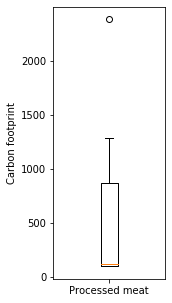

In [28]:
plt.figure(figsize=(2,5))
boxprmeat = plt.boxplot(df_prmeat['carbon-footprint_100g'])

plt.ylabel('Carbon footprint')
plt.xticks([1],['Processed meat'])
plt.savefig("processed meat carbon footprint.png", format="PNG", dpi = 100)

In [36]:
nutritionalcategories = ['catPNNS','nutrition_grade_fr_n']
df_nutcat = df_eco_all[nutritionalcategories]
df_nutcat[:10]

,catPNNS,nutrition_grade_fr_n
0,chocolate products,8.0
1,meat,8.0
2,processed meat,1.0
3,chocolate products,1.0
4,chocolate products,1.0
5,chocolate products,1.0
6,chocolate products,1.0
7,chocolate products,1.0
8,processed meat,1.0
9,cheese,8.0


In [37]:
df_nutcat.describe()

,nutrition_grade_fr_n
count,301820.000000
mean,12.622484
std,8.225267
min,1.000000
25%,8.000000
50%,8.000000
75%,21.000000
max,25.000000


In [63]:

df_nutcat = df_nutcat.groupby(['catPNNS']).mean()
df_nutcat = df_nutcat.sort_values(by=['nutrition_grade_fr_n'], ascending=True)
df_nutcat = df_nutcat.reset_index(drop=False)
df_nutcat.head()

,catPNNS,nutrition_grade_fr_n
0,chocolate products,2.227424
1,fruit nectars,2.668821
2,sweetened beverages,3.169091
3,biscuits and cakes,5.428198
4,pastries,5.786113


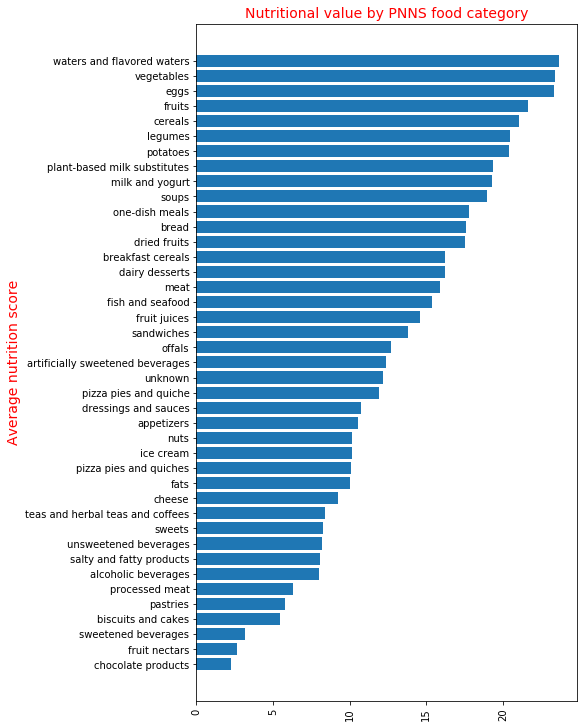

In [39]:
plt.figure(figsize=(8,10))
plt.barh(df_nutcat['catPNNS'], df_nutcat['nutrition_grade_fr_n'])
plt.title('Nutritional value by PNNS food category', color="red", fontsize = 14)
plt.ylabel('Average nutrition score', color="red", fontsize = 14)
plt.xticks(rotation='vertical')
plt.rcParams['figure.constrained_layout.use'] = True
plt.savefig("PNNS Category based nutrition.png", format="PNG", dpi = 100)

In [40]:
df_e = df_eco_all[df_eco_all['nutrition_grade_fr'] == "e"]
df_e_reduced = df_e[['nutrition_grade_fr_n','catPNNS']]
df_e_reduced = df_e_reduced.groupby(['catPNNS']).count()
df_e_reduced = df_e_reduced.sort_values(by=['nutrition_grade_fr_n'], ascending= False)
df_e_reduced = df_e_reduced.reset_index(drop=False)
df_e_reduced.head()

,catPNNS,nutrition_grade_fr_n
0,biscuits and cakes,11855
1,unknown,7611
2,chocolate products,7394
3,processed meat,6802
4,sweets,4639


In [43]:
total = np.sum(df_e_reduced.loc[:,'nutrition_grade_fr_n':].values)
print("tot: ",total)
df_e_reduced['percentage'] = (df_e_reduced['nutrition_grade_fr_n']/total)*100
df_e_reduced

tot:  46494


,catPNNS,nutrition_grade_fr_n,percentage
0,biscuits and cakes,11855,25.497914
2,chocolate products,7394,15.903127
3,processed meat,6802,14.629845
4,sweets,4639,9.977632
5,sweetened beverages,4451,9.573278
6,salty and fatty products,2235,4.807072
7,dressings and sauces,2229,4.794167
8,fats,1829,3.933841
9,unsweetened beverages,1795,3.860713
10,pastries,1201,2.583129


<Figure size 720x720 with 0 Axes>

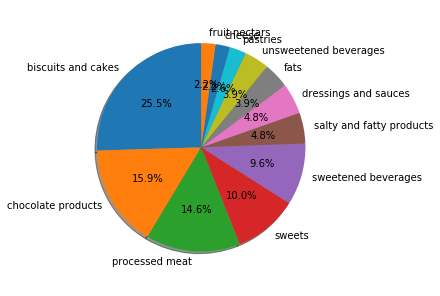

In [44]:

# pie chart E grade
plt.figure(figsize=(10,10))
labels = df_e_reduced['catPNNS']
sizes = df_e_reduced['percentage']


fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.savefig("Category E.png", format="PNG", dpi = 100)
plt.show()

In [45]:
df_a = df_eco_all[df_eco_all['nutrition_grade_fr'] == "a"]
df_a_reduced = df_a[['nutrition_grade_fr_n','catPNNS']]
df_a_reduced = df_a_reduced.groupby(['catPNNS']).count()
df_a_reduced = df_a_reduced.sort_values(by=['nutrition_grade_fr_n'], ascending= False)
df_a_reduced = df_a_reduced.reset_index(drop=False)

In [46]:
df_a_reduced = df_a_reduced[df_a_reduced.catPNNS != 'unknown'] 
df_a_reduced = df_a_reduced[df_a_reduced['nutrition_grade_fr_n'] > 1000]
total = np.sum(df_a_reduced.loc[:,'nutrition_grade_fr_n':].values)
print("tot: ",total)
df_a_reduced['percentage'] = (df_a_reduced['nutrition_grade_fr_n']/total)*100
df_a_reduced

tot:  35940


,catPNNS,nutrition_grade_fr_n,percentage
0,vegetables,7552,21.012799
1,cereals,7441,20.703951
2,fruits,4163,11.583194
4,one-dish meals,3275,9.112410
5,milk and yogurt,2897,8.060657
6,legumes,2505,6.969950
7,waters and flavored waters,1885,5.244853
8,meat,1861,5.178075
9,bread,1702,4.735671
10,fish and seafood,1559,4.337785


<Figure size 720x720 with 0 Axes>

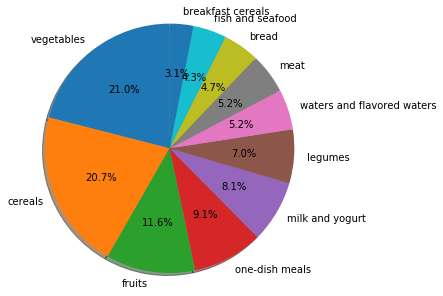

In [74]:
plt.figure(figsize=(10,10)) # pie chart A grade
labels = df_a_reduced['catPNNS']
sizes = df_a_reduced['percentage']


fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.savefig("Category A.png", format="PNG", dpi = 100)
plt.show()

In [58]:

df_nutriscore = df_eco_all.groupby(['nutrition_grade_fr']).count()

df_nutriscore = df_nutriscore.reset_index(drop=False)
df_nutriscore.head()

,nutrition_grade_fr,product_name,nutrition_grade_fr_n,catPNNS,carbon-footprint_100g,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n
0,a,44081,44324,44324,60,32192,32192
1,b,41134,41323,41323,30,27647,27647
2,c,64730,65055,65055,56,42595,42595
3,d,91225,91691,91691,58,56672,56672
4,e,59130,59427,59427,94,38485,38485


In [60]:
total1 = np.sum(df_nutriscore.loc[:,'product_name':].values)
print("tot: ",total)
df_nutriscore['percentage'] = (df_nutriscore['product_name']/total)*100

tot:  35940


<Figure size 720x720 with 0 Axes>

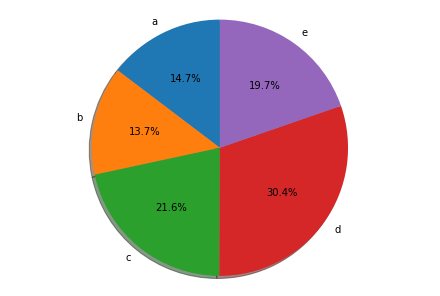

In [61]:
plt.figure(figsize=(10,10)) # pie chart A grade
labels = df_nutriscore['nutrition_grade_fr']
sizes = df_nutriscore['percentage']


fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.savefig("eco_cat.png", format="PNG", dpi = 100)
plt.show()

In [ ]:
df_cat = df_eco_all.groupby(['nutrition_grade_fr']).count()

df_nutriscore = df_nutriscore.reset_index(drop=False)
df_nutriscore.head()

In [69]:
df_nutcat1 = df_eco_all.groupby(['catPNNS']).count()
df_nutcat1 = df_nutcat1.sort_values(by=['product_name'], ascending=False)
df_nutcat1 = df_nutcat1.reset_index(drop=False)
df_nutcat1.head()

,catPNNS,product_name,nutrition_grade_fr,nutrition_grade_fr_n,carbon-footprint_100g,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n
0,unknown,681430,37534,37534,110,243416,243416
1,biscuits and cakes,25852,23328,23328,11,17443,17443
2,sweets,23815,16308,16308,14,14870,14870
3,one-dish meals,21278,19000,19000,12,14730,14730
4,cheese,19462,17196,17196,14,10320,10320


In [72]:
df_nutcat1.tail()

,catPNNS,product_name,nutrition_grade_fr,nutrition_grade_fr_n,carbon-footprint_100g,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,percentage
36,eggs,1674,848,848,5,794,794,4.657763
37,fruit nectars,1437,1238,1238,4,875,875,3.998331
38,teas and herbal teas and coffees,841,585,585,0,300,300,2.340011
39,offals,430,380,380,0,250,250,1.196439
40,pizza pies and quiches,404,378,378,2,297,297,1.124096


tot:  35940


<Figure size 720x720 with 0 Axes>

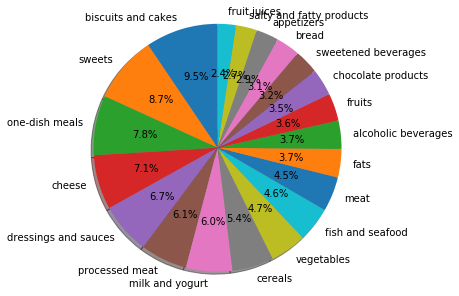

In [75]:
df_nutcat1 = df_nutcat1[df_nutcat1['product_name'] < 150000] 
df_nutcat1 = df_nutcat1[df_nutcat1['product_name'] > 5000] 
total2 = np.sum(df_nutcat1.loc[:,'product_name':].values)
print("tot: ",total)
df_nutcat1['percentage'] = (df_nutcat1['product_name']/total)*100

plt.figure(figsize=(10,10)) # pie chart A grade
labels = df_nutcat1['catPNNS']
sizes = df_nutcat1['percentage']


fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.savefig("Category main.png", format="PNG", dpi = 100)
plt.show()